# Exploratory Data Analysis

### Dependencies

In [1]:
library(dplyr)
#install.packages("ggplot2")
library(ggplot2)
library(tidyr)
library(forcats)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [1]:
args <- commandArgs(trailingOnly = TRUE)
input_file <- args[1]

### Clean Data Load

In [2]:
# reading the data from "../data/crime_1617_clean_data.csv"
crime <- read.csv("../data/crime_1617_clean_data.csv")
crime %>% 
  head(15)

Unnamed..0,X,ID,Case.Number,Date,Block,IUCR,Primary.Type,Description,Location.Description,...,FBI.Code,X.Coordinate,Y.Coordinate,Year,Updated.On,Latitude,Longitude,Location,Crime_Date,Crime_Time
1,3,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,SEXUAL ASSAULT,DOMESTIC BATTERY SIMPLE,APARTMENT,...,08B,1154907,1893681,2016,05/10/2016 03:56:50 PM,41.86407,-87.70682,"(41.864073157, -87.706818608)",2016-05-03,23:40:00
2,89,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,SEXUAL ASSAULT,DOMESTIC BATTERY SIMPLE,RESIDENCE,...,08B,1183066,1864330,2016,05/10/2016 03:56:50 PM,41.78292,-87.60436,"(41.782921527, -87.60436317)",2016-05-03,21:40:00
3,197,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC INDECENCY,RECKLESS CONDUCT,STREET,...,24,1140789,1904819,2016,05/10/2016 03:56:50 PM,41.89491,-87.75837,"(41.894908283, -87.758371958)",2016-05-03,23:31:00
4,673,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,SEXUAL ASSAULT,SIMPLE,SIDEWALK,...,08B,1143223,1901475,2016,05/10/2016 03:56:50 PM,41.88569,-87.74952,"(41.885686845, -87.749515983)",2016-05-03,22:10:00
5,911,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,...,06,1139890,1901675,2016,05/10/2016 03:56:50 PM,41.88630,-87.76175,"(41.886297242, -87.761750709)",2016-05-03,22:00:00
6,1108,10508702,HZ250447,2016-05-03 22:35:00,082XX S MARYLAND AVE,041A,SEXUAL ASSAULT,AGGRAVATED: HANDGUN,STREET,...,04B,1183336,1850642,2016,05/10/2016 03:56:50 PM,41.74535,-87.60380,"(41.745354023, -87.603798903)",2016-05-03,22:35:00
7,1130,10508703,HZ250489,2016-05-03 22:30:00,027XX S STATE ST,0460,SEXUAL ASSAULT,SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,...,08B,1176730,1886544,2016,05/10/2016 03:56:50 PM,41.84402,-87.62692,"(41.844023772, -87.626923253)",2016-05-03,22:30:00
8,1801,10508704,HZ250514,2016-05-03 21:30:00,002XX E 46TH ST,0460,SEXUAL ASSAULT,SIMPLE,RESIDENCE PORCH/HALLWAY,...,08B,1178514,1874573,2016,05/10/2016 03:56:50 PM,41.81113,-87.62074,"(41.811133958, -87.62074077)",2016-05-03,21:30:00
9,1868,10508709,HZ250523,2016-05-03 16:00:00,014XX W DEVON AVE,0460,SEXUAL ASSAULT,SIMPLE,SIDEWALK,...,08B,1165696,1942616,2016,05/10/2016 03:56:50 PM,41.99813,-87.66581,"(41.99813061, -87.665814038)",2016-05-03,16:00:00
10,1891,10508982,HZ250667,2016-05-03 22:30:00,069XX S ASHLAND AVE,0486,SEXUAL ASSAULT,DOMESTIC BATTERY SIMPLE,STREET,...,08B,1166876,1858796,2016,05/10/2016 03:56:50 PM,41.76810,-87.66388,"(41.768096835, -87.663878589)",2016-05-03,22:30:00


### Analysing the crimes in 2016 and 2017

Primary.Type,counts
THEFT,94556
SEXUAL ASSAULT,50723
ARSON,30693
ASSAULT,18199
OTHER OFFENSE,15910
DECETIVE PRACTICE,13511
NARCOTICS,10668
CRIMINAL TRESPASS,6209
WEAPONS VIOLATION,3433
OFFENSE INVOLVING CHILDREN,1953


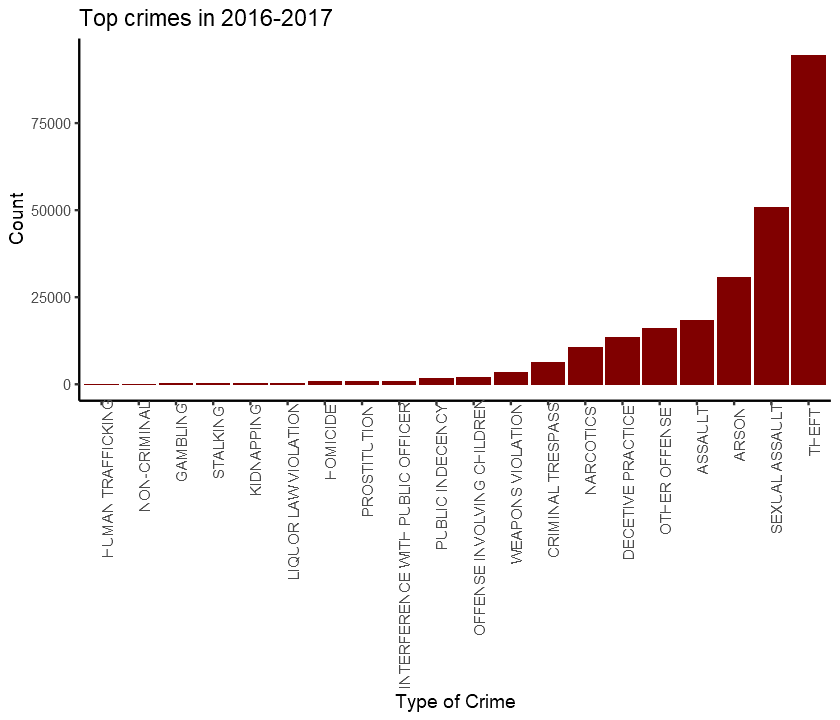

In [18]:
(crime_count <- crime %>% 
  group_by(Primary.Type) %>% 
  summarise(counts=n()) %>%
  arrange(desc(counts)) )

#(crime_co_plot <- crime_count %>% 
#  head(10))

options(repr.plot.width = 7, repr.plot.height = 6)

crime_count %>% 
  mutate(Primary.Type = fct_reorder(Primary.Type, counts)) %>% 
  ggplot(aes(x=Primary.Type, y=counts)) +
  geom_bar(stat="identity", fill="#800000") +
  theme_bw() +
  guides(fill=FALSE) +
  labs(title="Top crimes in 2016-2017", x="Type of Crime", y="Count") +
  theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()) +
  theme(axis.text.x=element_text(angle=90,hjust=1)) 

### Analysing the location of the crimes in 2016 and 2017 

Location.Description,counts
STREET,59363
RESIDENCE,40786
APARTMENT,31787
SIDEWALK,22413
OTHER,9950
PARKING LOT/GARAGE(NON.RESID.),7840
SMALL RETAIL STORE,5631
RESTAURANT,5411
RESIDENTIAL YARD (FRONT/BACK),5397
ALLEY,5130


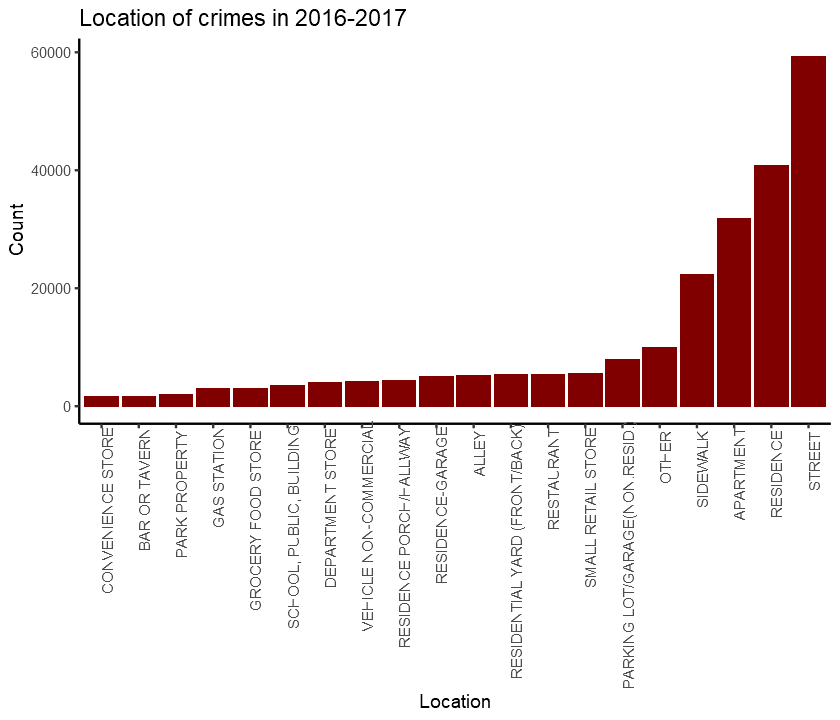

In [22]:
(crime_location <- crime %>% 
  group_by(Location.Description) %>% 
  summarise(counts=n()) %>%
  arrange(desc(counts)) %>% 
  head(20))

crime_loc_plot <- crime_location %>% 
  head(20)

options(repr.plot.width = 7, repr.plot.height = 6)

crime_loc_plot %>% 
  mutate(Location.Description = fct_reorder(Location.Description, counts)) %>%  
  ggplot(aes(x=Location.Description, y=counts)) +
  geom_bar(stat="identity", fill="#800000") +
  theme_bw() +
  guides(fill=FALSE) +
  theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()) +
  labs(title="Location of crimes in 2016-2017", x="Location", y="Count") +
  theme(axis.text.x=element_text(angle=90,hjust=1))


### Analysing the number of crimes and arrests per year

In [19]:
# Counting the number of crimes per year
(crime_year <- crime %>% 
  group_by(Year, Primary.Type) %>%
  summarise(crime_count=n()))  

Year,Primary.Type,crime_count
2016,ARSON,30693
2016,ASSAULT,18199
2016,CRIMINAL TRESPASS,6209
2016,DECETIVE PRACTICE,13511
2016,GAMBLING,188
2016,HOMICIDE,749
2016,HUMAN TRAFFICKING,7
2016,INTERFERENCE WITH PUBLIC OFFICER,926
2016,KIDNAPPING,193
2016,LIQUOR LAW VIOLATION,210


In [20]:
# Counting the number of arrests per year
(arrest_year <- crime %>% 
  group_by(Year, Primary.Type) %>%
  filter(Arrest==1) %>%  
  summarise(arrest_count=n()))

Year,Primary.Type,arrest_count
2016,ARSON,1660
2016,ASSAULT,3413
2016,CRIMINAL TRESPASS,3714
2016,DECETIVE PRACTICE,643
2016,GAMBLING,188
2016,HOMICIDE,158
2016,INTERFERENCE WITH PUBLIC OFFICER,879
2016,KIDNAPPING,10
2016,LIQUOR LAW VIOLATION,209
2016,NARCOTICS,10661


In [21]:
# Obtaining the crime count and arrest count for each type of crime per year
crime_arrest_year <- left_join(crime_year,arrest_year)
crime_arrest_year <- gather(crime_arrest_year, key = "crime_arrest", value = "value", arrest_count, crime_count)
crime_arrest_year %>% head(10)

Joining, by = c("Year", "Primary.Type")


Year,Primary.Type,crime_arrest,value
2016,ARSON,arrest_count,1660
2016,ASSAULT,arrest_count,3413
2016,CRIMINAL TRESPASS,arrest_count,3714
2016,DECETIVE PRACTICE,arrest_count,643
2016,GAMBLING,arrest_count,188
2016,HOMICIDE,arrest_count,158
2016,HUMAN TRAFFICKING,arrest_count,NA
2016,INTERFERENCE WITH PUBLIC OFFICER,arrest_count,879
2016,KIDNAPPING,arrest_count,10
2016,LIQUOR LAW VIOLATION,arrest_count,209


Selecting by value


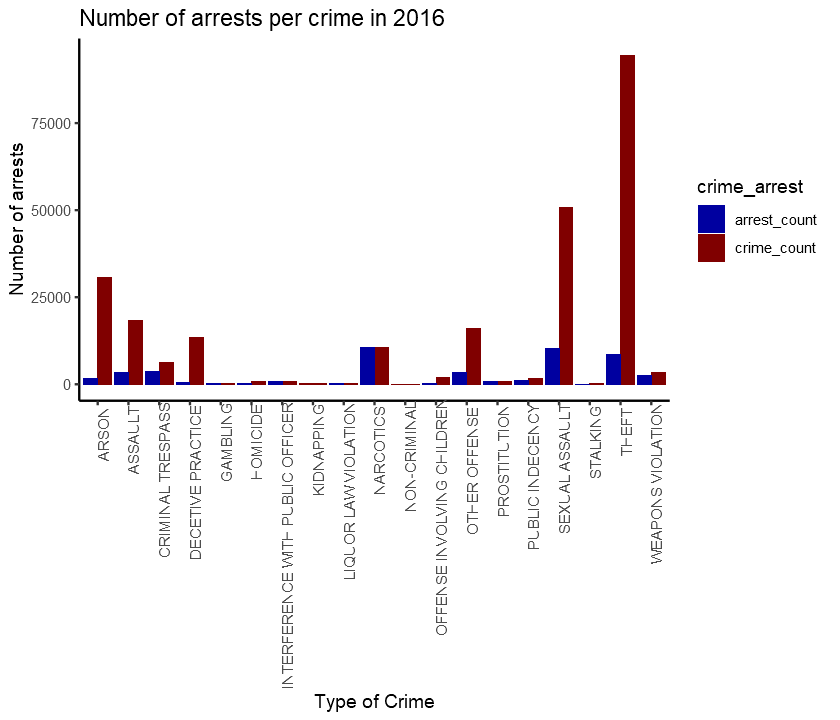

In [22]:
options(repr.plot.width = 7, repr.plot.height = 6)

crime_arrest_year %>% 
  top_n(35) %>% 
  ggplot(aes(x=Primary.Type, y=value, fill=crime_arrest)) +
  geom_bar(position = "dodge", stat="identity") +
  theme_bw() +
  theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()) +
  scale_fill_manual(values=c("#0000A0","#800000")) +
  labs(title="Number of arrests per crime in 2016", x="Type of Crime", y="Number of arrests") +
  theme(axis.text.x=element_text(angle=90,hjust=1))